<a href="https://colab.research.google.com/github/thachdct/thach/blob/master/PPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# link tham khảo: https://www.miai.vn/2021/04/22/principal-component-analysis-pca-tuyet-chieu-giam-chieu-du-lieu/
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.datasets import load_breast_cancer
# Đọc dữ liệu từ sklearn
cancer_set = load_breast_cancer()

# Chuyển thành DataFrame
cancer_data = pd.DataFrame(data=cancer_set ['data'], columns=cancer_set['feature_names'])

print(cancer_data.info()) # data có 30 cột, 569 dòng
cancer_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

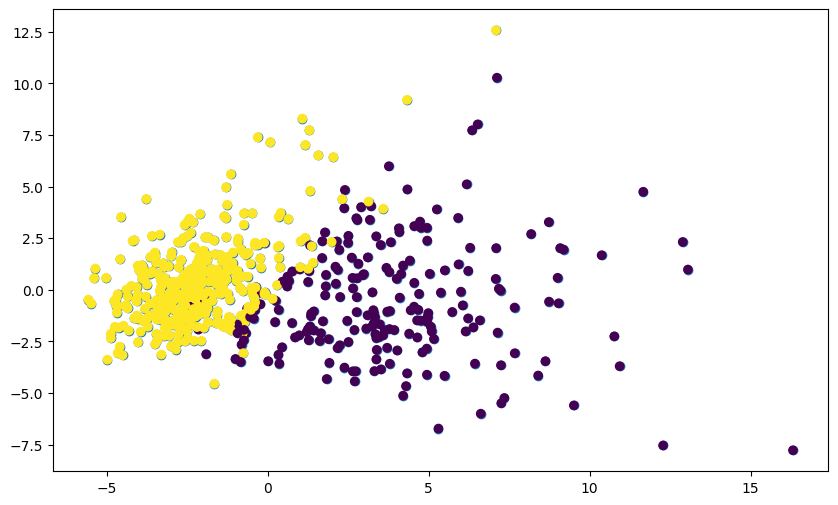

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean con

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer



#Bước 1:  Đọc dữ liệu từ sklearn
cancer_set = load_breast_cancer()

# Chuyển thành DataFrame
cancer_data = pd.DataFrame(data=cancer_set ['data'], columns=cancer_set['feature_names'])


'''
# => ko thể kèm cột nhãn target trong data có nhiều cột
# Chọn các cột để vẽ scatter plot
selected_columns = cancer_data.columns[:5]  # Chọn số cột đầu tiên để minh họa

# Vẽ scatter plot cho từng cặp cột
for i in range(len(selected_columns)):
    for j in range(i + 1, len(selected_columns)):
        plt.scatter(cancer_data[selected_columns[i]], cancer_data[selected_columns[j]], label=f'{selected_columns[i]} vs {selected_columns[j]}')

plt.xlabel(selected_columns[i])
plt.ylabel(selected_columns[j])
plt.title("Scatter Plot of Selected Columns")
plt.legend()
plt.show()

'''


#Bước 2: Đọc thông tin dữ liệu và nhận xét dữ liệu
print(cancer_data.head()) # xuất 5 dòng dữ liệu đầu
print(cancer_data.info()) # dữ liệu có 569 dòng x 30 cột

# Tính range cho từng cột = giá trị lớn nhất - giá trị nhỏ nhất của các cột
range_per_column = cancer_data.max() - cancer_data.min()

print("Range per column:",range_per_column) # => chênh lệch lớn

#Bước 3: chuẩn hóa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit vào dữ liệu
scaler.fit(cancer_data)
# Thực hiện transform scale
scale_cancer_data = scaler.transform(cancer_data)
#print(scale_cancer_data)

# Bước 4: Thực hiện PCA với số liệu đã chuẩn hoá
from sklearn.decomposition import PCA

# Khởi tạo đối tượng PCA với số comp = 2 (số chiều dữ liệu)
my_pca = PCA (n_components = 2 )
# Fit vào data
my_pca.fit(scale_cancer_data)
# Thực hiện transform
pca_scale_cancer_data = my_pca.transform(scale_cancer_data)
print("Dữ liệu gốc: ", scale_cancer_data.shape) # 569 row, 30 column
print("Dữ liệu sau PCA:" , pca_scale_cancer_data.shape) # 569 row, 2 column

# Bước 5: biểu diễn số liệu

plt.figure(figsize = (10,6))
# Thành phần comp số 1
pca_1 = pca_scale_cancer_data[:, 0]
# Thành phần comp số 2
pca_2 = pca_scale_cancer_data[:, 1]

# Vẽ đồ thị
plt.scatter(x=pca_1, y = pca_2)

print(cancer_set['target']) #target: nhãn của dữ liệu (1 là ung thư và 0 là ngược lại) cột này ko có trong data chuẩn hoá


#Bước 6: màu sắc của từng điểm dữ liệu theo class nhãn dán cột target
plt.scatter(x=pca_1, y = pca_2, c = cancer_set['target'])
plt.show()

# sau khi giảm chiều từ hơn 30 về 2 pca_scale_cancer_data là gì
print(my_pca.components_) #  có số dòng = số component và số cột = số features gốc
# chuyển thành dataframe để dễ nhìn
pca_comp = pd.DataFrame(data=my_pca.components_, columns=cancer_data.columns)
print(pca_comp.head())



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

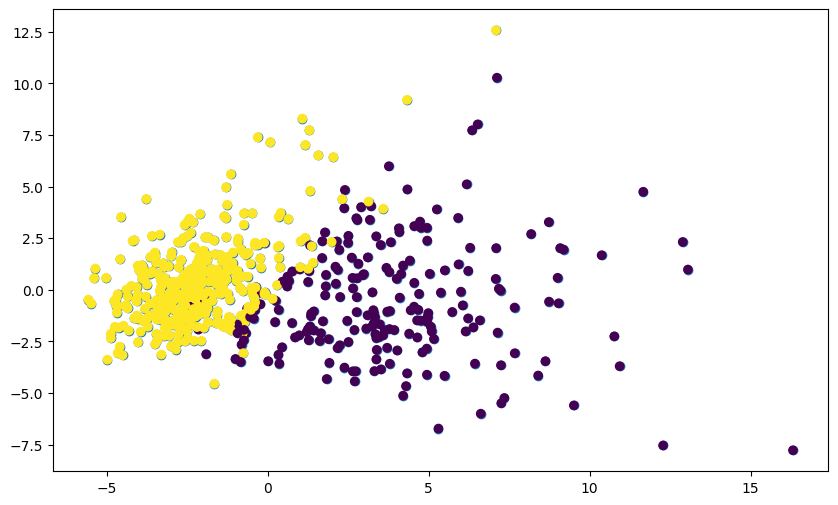

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean con

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer



#Bước 1:  Đọc dữ liệu từ sklearn
cancer_set = load_breast_cancer()

# Chuyển thành DataFrame
cancer_data = pd.DataFrame(data=cancer_set ['data'], columns=cancer_set['feature_names'])


'''
# => ko thể kèm cột nhãn target trong data có nhiều cột
# Chọn các cột để vẽ scatter plot
selected_columns = cancer_data.columns[:5]  # Chọn số cột đầu tiên để minh họa

# Vẽ scatter plot cho từng cặp cột
for i in range(len(selected_columns)):
    for j in range(i + 1, len(selected_columns)):
        plt.scatter(cancer_data[selected_columns[i]], cancer_data[selected_columns[j]], label=f'{selected_columns[i]} vs {selected_columns[j]}')

plt.xlabel(selected_columns[i])
plt.ylabel(selected_columns[j])
plt.title("Scatter Plot of Selected Columns")
plt.legend()
plt.show()

'''


#Bước 2: Đọc thông tin dữ liệu và nhận xét dữ liệu
print(cancer_data.head()) # xuất 5 dòng dữ liệu đầu
print(cancer_data.info()) # dữ liệu có 569 dòng x 30 cột

# Tính range cho từng cột = giá trị lớn nhất - giá trị nhỏ nhất của các cột
range_per_column = cancer_data.max() - cancer_data.min()

print("Range per column:",range_per_column) # => chênh lệch lớn

#Bước 3: chuẩn hóa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit vào dữ liệu
scaler.fit(cancer_data)
# Thực hiện transform scale
scale_cancer_data = scaler.transform(cancer_data)
#print(scale_cancer_data)

# Bước 4: Thực hiện PPCA với số liệu đã chuẩn hoá
from sklearn.decomposition import PCA

# Khởi tạo đối tượng PCA với số comp = 2 (số chiều dữ liệu)
#my_pca = PCA (n_components = 2 ) # Chú ý: n_components = n_features số chiều cần giảm
my_pca = PCA(n_components = 2, svd_solver='full')  # Chú ý:  sử dụng 'full', nghĩa là sử dụng toàn bộ ma trận SVD để tính toán các thành phần chính.
# Fit vào data
my_pca.fit(scale_cancer_data)
# Thực hiện transform
pca_scale_cancer_data = my_pca.transform(scale_cancer_data)
print("Dữ liệu gốc: ", scale_cancer_data.shape) # 569 row, 30 column
print("Dữ liệu sau PPCA:" , pca_scale_cancer_data.shape) # 569 row, 2 column

# Bước 5: biểu diễn số liệu

plt.figure(figsize = (10,6))
# Thành phần comp số 1
pca_1 = pca_scale_cancer_data[:, 0]
# Thành phần comp số 2
pca_2 = pca_scale_cancer_data[:, 1]

# Vẽ đồ thị
plt.scatter(x=pca_1, y = pca_2)

print(cancer_set['target']) #target: nhãn của dữ liệu (1 là ung thư và 0 là ngược lại) cột này ko có trong data chuẩn hoá


#Bước 6: màu sắc của từng điểm dữ liệu theo class nhãn dán cột target
plt.scatter(x=pca_1, y = pca_2, c = cancer_set['target'])
plt.show()

# sau khi giảm chiều từ hơn 30 về 2 pca_scale_cancer_data là gì
print(my_pca.components_) #  có số dòng = số component và số cột = số features gốc
# chuyển thành dataframe để dễ nhìn
pca_comp = pd.DataFrame(data=my_pca.components_, columns=cancer_data.columns)
print(pca_comp.head())




# New Section

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


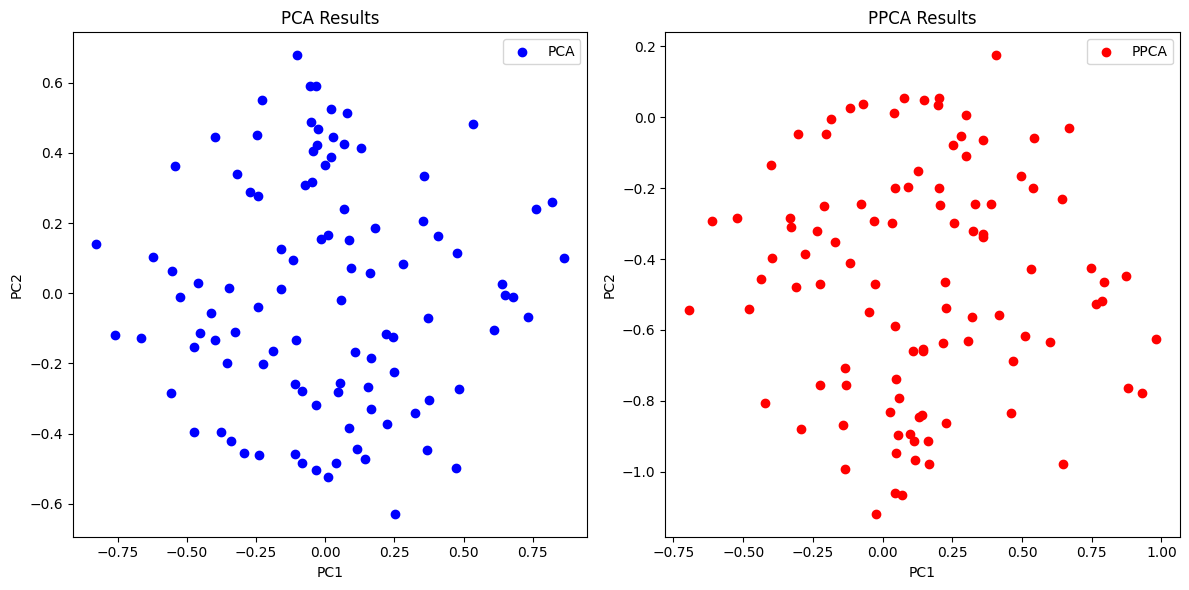

In [17]:
!pip install ppca  # Install the ppca package
!pip install xlsxwriter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ppca import PPCA
from google.colab import drive

# Mount Google Drive để lưu file Excel vào thư mục Drive
drive.mount('/content/drive')

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 5)  # Replace this with your dataset

# Number of components to retain after dimensionality reduction
n_components = 2

# PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# PPCA
ppca = PPCA()
ppca.fit(X, d=n_components)  # Here, 'd' is used to specify the number of components
X_ppca = ppca.transform(X)

# Convert results to DataFrame
pca_results = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
ppca_results = pd.DataFrame(data=X_ppca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Specify the path to save the Excel file in your Google Drive
# excel_path = '/content/drive/MyDrive/GG_Colab/dimensionality_reduction_results.xlsx'---> delete by Thach

# Save to Excel
with pd.ExcelWriter('ppca_result.xlsx', engine='xlsxwriter') as excel_writer:
    pca_results.to_excel(excel_writer, sheet_name='PCA_Results', index=False)
    ppca_results.to_excel(excel_writer, sheet_name='PPCA_Results', index=False)

# print(f"Results saved to '{excel_path}'")

# Plotting
plt.figure(figsize=(12, 6))

# PCA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='PCA')
plt.title('PCA Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# PPCA
plt.subplot(1, 2, 2)
plt.scatter(X_ppca[:, 0], X_ppca[:, 1], c='red', label='PPCA')
plt.title('PPCA Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#
# So sánh các thành phần chính của PCA và PPCA
print("PCA components:")
print(pca.components_)

print("\nPPCA components:")
print(ppca.C.T)  # 'C' matrix contains the principal components in ppca
# So sánh tỷ lệ phương sai giải thích của PCA và PPCA
print("\nExplained variance (PCA):", np.sum(pca.explained_variance_ratio_))
print("Explained variance (PPCA):", np.sum(ppca.var_exp))



PCA components:
[[ 0.41852924 -0.46099129 -0.48468197  0.44426648  0.4243006 ]
 [-0.54131213  0.13865383  0.31487587  0.34094634  0.6872882 ]]

PPCA components:
[[ 0.4502835  -0.44499673 -0.5204173   0.45363245  0.35015157]
 [ 0.51869345 -0.09812446 -0.29487744 -0.43381975 -0.66796438]]

Explained variance (PCA): 0.5249303175585799
Explained variance (PPCA): 0.8204337008103091
